In [104]:
import numpy as np
import pandas as pd
import os
import ast
import nltk
import functools
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [93]:
WORD_COUNTS_NAME = 'word_counts'
TOTAL_NAME = 'total_words'
COMMENTS_COLUMN = 'comments'
FREQUENCY_NAME = 'frequency'
MAGNIFY_LIST = ['too', 'very', 'that', 'so', 'as']
NEGATIVE_LIST = ['not', 'aren\'t', 'isn\'t', 'wasn\'t', 'didn\'t']
WORD_CATEGORIES = {
    'rigor': ['easy', 'hard', 'rigorous'],
    'subject': ['math', 'computer', 'english', 'history', 'economics'],
    'activity': ['read', 'write', 'listen', 'watch', 'code', 'proof']
}

In [13]:
df = pd.read_csv('data/final.csv').drop('Unnamed: 0', 1)

In [15]:
'''Given a coursename and a year, finds workload statistics'''
def find_workload_hist(coursename, year):
    print "hi"
    
'''Plots a basic histogram of series'''
def plot_basic_hist(ser, b, r):
    plt.hist(ser.fillna(0).values, bins=b, range=r)
    
'''Plug in department to plot histogram.'''
def plot_workload_by_department(frame, department):
    filt = frame['department1'] == department
    plot_basic_hist(frame[filt]['Course_Workload_Rating'], 50, (0,15))

In [87]:
def get_words(text):
    return re.compile('\w+').findall(text)

'''See if a word was used in a negative context'''
def probe_if_negative(word1, word2):
    if word1 in NEGATIVE_LIST:
        return True
    elif (word2 in NEGATIVE_LIST) and (word1 in MAGNIFY_LIST):
        return True
    else:
        return False

def get_word_dict(comments, to_return):
    d = {}
    t = 0
    for comment in comments:
        last_word = ''
        two_words_ago = ''
        for word in get_words(comment):
            word = word.lower() # Make lower case
            t += 1
            try:
                if probe_if_negative(last_word, two_words_ago):
                    d['not_' + word] += 1
                else:
                    d[word] += 1
            except: 
                if probe_if_negative(last_word, two_words_ago):
                    d['not_' + word] = 1
                else:
                    d[word] = 1
            two_words_ago = last_word
            last_word = word
    if to_return == 'words':
        return d
    elif to_return == 'count':
        return t

def preprocessing(to_return, row):
    raw_comments = row[COMMENTS_COLUMN]
    return get_word_dict(ast.literal_eval(raw_comments), to_return)

def count_words(in_df):
    in_df = in_df.copy()
    in_df[TOTAL_NAME] = in_df.apply(functools.partial(preprocessing, 'count'), axis=1)
    in_df[WORD_COUNTS_NAME] = in_df.apply(functools.partial(preprocessing, 'words'), axis=1)
    return in_df

'''Calculates the frequency of a word in the comments of row'''
def calculate_frequency(word, row):
    try:
        return float(row[WORD_COUNTS_NAME][word]) / float(row[TOTAL_NAME])
    except:
        return 0
    
'''Weighted mean'''
def m(x, w):
    return np.sum(x * w) / np.sum(w)

'''Weighted covariance'''
def cov(x, y, w):
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

'''Weighted correlation'''
def corr(x, y, w):
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

''' Returns two column dataframe consisting of df[column] and the frequency of the word.
    Weights according to the number of comments. '''
def find_word_correlations(in_df, word, column):
    freq = in_df.apply(functools.partial(calculate_frequency, word), axis=1)
    possibly_nan = pd.concat([freq, in_df[column], in_df[COMMENTS_COLUMN]], 
                             axis=1, 
                             keys=[FREQUENCY_NAME, column, COMMENTS_COLUMN])
    clean_df = possibly_nan.dropna(axis=0, how='any')
    return corr(clean_df[FREQUENCY_NAME], 
                clean_df[column],
                clean_df[COMMENTS_COLUMN].apply(lambda x: len(ast.literal_eval(x))))

In [88]:
df2 = count_words(df)

In [106]:
'''Finds overall frequency of words in df by constructing total count and total dict'''
def find_word_freqs_over_df(in_df):
    in_df = in_df.copy()
    D = Counter({})
    T = 0
    for index, row in in_df.iterrows():
        D += Counter(row[WORD_COUNTS_NAME])
        T += row[TOTAL_NAME]
    return dict(D), T

'''Breaks df into subdfs, then finds frequencies for subdfs.'''
def find_group_word_freqs(whole_df, column, break_rule):
    whole_df = whole_df.copy()
    gb = df.groupby('ZZ')    
    [gb.get_group(x) for x in gb.groups]

In [115]:
ctr, total = find_word_freqs_over_df(df2)

In [140]:
sorted_words = sorted(ctr.items(), key=lambda word_count: -word_count[1]) 

In [143]:
c = 0
t = 0
for k,v in sorted_words:
    c += 1
    t += v
    if t > total * .9:
        break
c, t

(1211, 6865013)

In [131]:
total

7627306

So the previous work worked over word frequencies.  In some ways this is not the best way to operate.  Higher correlations might just correspond to words that are mentioned more.  Another way to think about this is to, for each word, keep track of a LIST of target_col values when that word was mentioned in some comment.

In [ ]:
'''Turns a dict of occurence count form into a dict of target_value_list form'''
def convert_dict(in_dict, value):
    in_dict = dict(in_dict) # Make a copy so nothing bad happens
    new_dict = {}
    for k, v in in_dict.iteritems():
        new_dict[k] = [value] * v
    return new_dict

'''Applies convert dict to each row of the in_df'''


In [119]:
from nltk.book import *

In [122]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [149]:
len(text1)

260819

In [39]:
text1.concordance("volume")

Displaying 13 of 13 matches:
bsorbed in reading from a ponderous volume . " Bildad ," cried Captain Peleg ,
es bodily , in their entire liberal volume , and boldly sort them that way . A
ure , yet the bookbinder ' s Quarto volume in its dimensioned form does not pr
not preserve the shape of the Folio volume , but the Octavo volume does . BOOK
f the Folio volume , but the Octavo volume does . BOOK II . ( OCTAVO ), CHAPTE
 Old Greenland ;" in this admirable volume , all standers of mast - heads are 
wonder , then , that ever gathering volume from the mere transit over the wide
tant a one as will be found in this volume ; but the leading matter of it requ
y of it , which necessitates a vast volume of commentaries to expound it . Fir
 ' s two whales . Elsewhere in this volume the slanderous aspersion has been d
 , I stumbled upon an ancient Dutch volume , which , by the musty whaling smel
ighty theme . No great and enduring volume can ever be written on the flea , t
 to unfold ; a wondrous

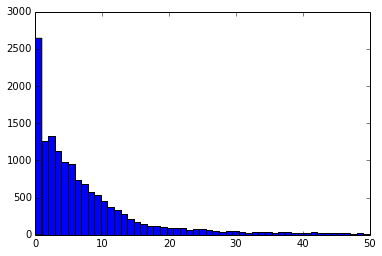

In [13]:
plot_basic_hist(df['number_of_comments'], 51, (0,50))

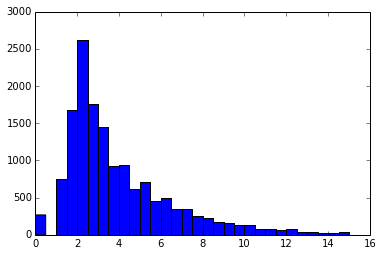

In [14]:
plot_basic_hist(df['Course_Workload_Rating'], 30, (0,15))

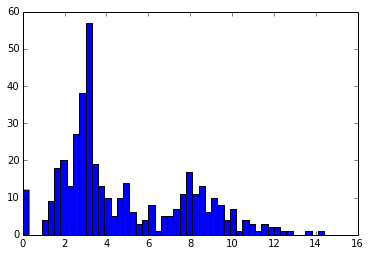

In [15]:
plot_workload_by_department(df, 'MATH')

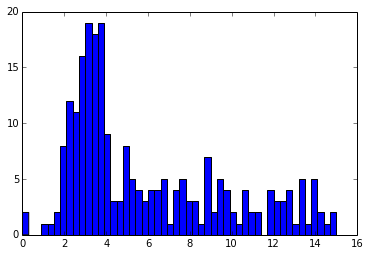

In [60]:
plot_workload_by_department(df, 'COMPSCI')

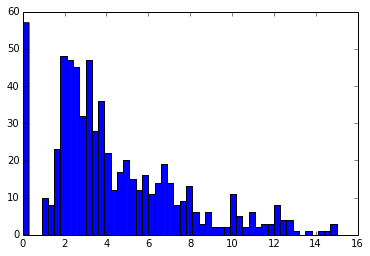

In [61]:
plot_workload_by_department(df, 'ECON')

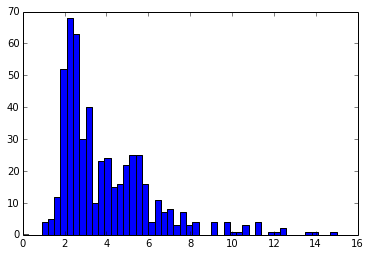

In [66]:
plot_workload_by_department(df, 'ENGLISH')

In [30]:
(df.department1 == 'MATH').sum()

431

(array([ 0.00964854,  0.01929708,  0.04341844,  0.0337699 ,  0.03859417,
         0.09166115,  0.15437668,  0.13990387,  0.22674075,  0.26051065,
         0.28945627,  0.36664461,  0.36182034,  0.4197116 ,  0.41006305,
         0.36182034,  0.29910482,  0.29428054,  0.26533492,  0.18814658,
         0.14955241,  0.11578251,  0.07718834,  0.08201261,  0.05789125,
         0.01929708,  0.00482427,  0.02412136,  0.00964854,  0.00964854]),
 array([-2.87954065, -2.67225546, -2.46497026, -2.25768507, -2.05039987,
        -1.84311468, -1.63582948, -1.42854429, -1.22125909, -1.01397389,
        -0.8066887 , -0.5994035 , -0.39211831, -0.18483311,  0.02245208,
         0.22973728,  0.43702247,  0.64430767,  0.85159286,  1.05887806,
         1.26616325,  1.47344845,  1.68073364,  1.88801884,  2.09530403,
         2.30258923,  2.50987442,  2.71715962,  2.92444481,  3.13173001,
         3.33901521]),
 <a list of 30 Patch objects>)

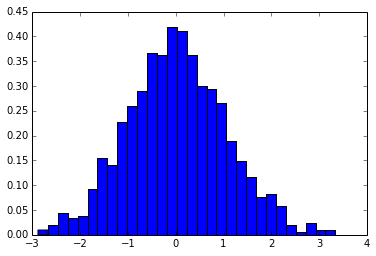

In [14]:
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=30)